# Comparison between synthetic and real data
The objective is to compare synthetic dataset with the real one to identify the differences in distributions and relations between the correspondent variables.

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
# import sweetviz as sv
from scipy.stats import iqr

In [2]:
synth_data = joblib.load('../outputs/models/train_data.pkl')
real_data = joblib.load('../outputs/models/test_data.pkl')

In [3]:
synth_data.columns

Index(['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'top_icv_status_before', 'top_icv_status_after',
       'bottom_icv_status_before', 'bottom_icv_status_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'action_result', 'T_Z1_delta', 'T_Z0_delta', 'P_Z1_delta', 'P_Z0_delta',
       'P_WH_delta', 'P_bottom_delta', 'T_WH_delta', 'command_type_0',
       'command_type_1', 'command_type_2', 'command_type_3', 'command_type_4'],
      dtype='object')

In [4]:
synth_data.drop(columns={'P_WH_delta', 'P_Z0_delta', 'P_Z1_delta', 'P_bottom_delta', 'T_WH_delta',
                        'T_Z0_delta', 'T_Z1_delta', 'bottom_icv_status_after', 'bottom_icv_status_before', 'command_type_0',
                       'command_type_1', 'command_type_2', 'command_type_3', 'command_type_4',
                       'top_icv_status_after', 'top_icv_status_before'}, inplace=True)

real_data.drop(columns={'P_WH_delta', 'P_Z0_delta', 'P_Z1_delta', 'P_bottom_delta', 'T_WH_delta',
                        'T_Z0_delta', 'T_Z1_delta', 'bottom_icv_status_after', 'bottom_icv_status_before', 'command_type_0',
                       'command_type_1', 'command_type_2', 'command_type_3', 'command_type_4',
                       'top_icv_status_after', 'top_icv_status_before'}, inplace=True)

In [5]:
real_data.columns = real_data.columns.sort_values(ascending=True)
synth_data.columns = synth_data.columns.sort_values(ascending=True)

In [6]:
real_data.corr()

,P_WH_after,P_WH_before,P_Z0_after,P_Z0_before,P_Z1_after,P_Z1_before,P_bottom_after,P_bottom_before,T_WH_after,T_WH_before,T_Z0_after,T_Z0_before,T_Z1_after,T_Z1_before,action_result
P_WH_after,1.000000,0.806118,1.000000,0.806118,1.000000,0.806118,0.204532,0.322117,-0.820202,-0.560846,-0.927619,-0.626080,-0.420609,-0.260545,0.207434
P_WH_before,0.806118,1.000000,0.806118,1.000000,0.806118,1.000000,0.288120,0.208761,-0.636984,-0.613648,-0.763922,-0.673569,-0.304726,-0.418296,0.265633
P_Z0_after,1.000000,0.806118,1.000000,0.806118,1.000000,0.806118,0.204532,0.322117,-0.820202,-0.560846,-0.927619,-0.626080,-0.420609,-0.260545,0.207434
P_Z0_before,0.806118,1.000000,0.806118,1.000000,0.806118,1.000000,0.288120,0.208761,-0.636984,-0.613648,-0.763922,-0.673569,-0.304726,-0.418296,0.265633
P_Z1_after,1.000000,0.806118,1.000000,0.806118,1.000000,0.806118,0.204532,0.322117,-0.820202,-0.560846,-0.927619,-0.626080,-0.420609,-0.260545,0.207434
P_Z1_before,0.806118,1.000000,0.806118,1.000000,0.806118,1.000000,0.288120,0.208761,-0.636984,-0.613648,-0.763922,-0.673569,-0.304726,-0.418296,0.265633
P_bottom_after,0.204532,0.288120,0.204532,0.288120,0.204532,0.288120,1.000000,0.776935,-0.224960,-0.259657,-0.266794,-0.278790,0.246160,-0.010505,0.331242
P_bottom_before,0.322117,0.208761,0.322117,0.208761,0.322117,0.208761,0.776935,1.000000,-0.324127,-0.135333,-0.350733,-0.148211,0.036426,0.246210,0.291667
T_WH_after,-0.820202,-0.636984,-0.820202,-0.636984,-0.820202,-0.636984,-0.224960,-0.324127,1.000000,0.659841,0.943625,0.607387,0.484804,0.319414,-0.121191
T_WH_before,-0.560846,-0.613648,-0.560846,-0.613648,-0.560846,-0.613648,-0.259657,-0.135333,0.659841,1.000000,0.667608,0.970613,0.457526,0.378883,-0.169190


In [7]:
synth_data.corr()

,P_WH_after,P_WH_before,P_Z0_after,P_Z0_before,P_Z1_after,P_Z1_before,P_bottom_after,P_bottom_before,T_WH_after,T_WH_before,T_Z0_after,T_Z0_before,T_Z1_after,T_Z1_before,action_result
P_WH_after,1.000000,0.988574,0.988788,0.988312,-0.021970,-0.022057,0.057880,0.057037,-0.062609,-0.055758,0.846306,0.837574,0.823451,0.821921,0.017172
P_WH_before,0.988574,1.000000,0.988731,0.988329,-0.022510,-0.022625,0.056885,0.057682,-0.062607,-0.055517,0.838856,0.845063,0.821008,0.824091,0.016733
P_Z0_after,0.988788,0.988731,1.000000,0.988423,-0.022447,-0.022607,0.057639,0.055584,-0.063156,-0.055608,0.843015,0.838140,0.823045,0.821870,0.016765
P_Z0_before,0.988312,0.988329,0.988423,1.000000,-0.023242,-0.023324,0.055597,0.055408,-0.062435,-0.056872,0.840407,0.841120,0.820889,0.823961,0.019311
P_Z1_after,-0.021970,-0.022510,-0.022447,-0.023242,1.000000,0.996413,0.092735,0.096358,0.084109,0.092687,0.063814,0.066065,-0.381710,-0.375868,0.000663
P_Z1_before,-0.022057,-0.022625,-0.022607,-0.023324,0.996413,1.000000,0.093518,0.097531,0.085060,0.094257,0.064022,0.065625,-0.380151,-0.377059,-0.000304
P_bottom_after,0.057880,0.056885,0.057639,0.055597,0.092735,0.093518,1.000000,0.640352,0.517402,0.517677,0.057384,0.058739,0.228026,0.190674,-0.001571
P_bottom_before,0.057037,0.057682,0.055584,0.055408,0.096358,0.097531,0.640352,1.000000,0.518318,0.528321,0.057071,0.054297,0.188215,0.230811,-0.000190
T_WH_after,-0.062609,-0.062607,-0.063156,-0.062435,0.084109,0.085060,0.517402,0.518318,1.000000,0.599081,-0.048042,-0.041010,0.113333,0.080348,-0.012393
T_WH_before,-0.055758,-0.055517,-0.055608,-0.056872,0.092687,0.094257,0.517677,0.528321,0.599081,1.000000,-0.042143,-0.035155,0.078532,0.121759,-0.018866


In [8]:
pcd = abs(real_data.corr() - synth_data.corr())

In [9]:
pcd

,P_WH_after,P_WH_before,P_Z0_after,P_Z0_before,P_Z1_after,P_Z1_before,P_bottom_after,P_bottom_before,T_WH_after,T_WH_before,T_Z0_after,T_Z0_before,T_Z1_after,T_Z1_before,action_result
P_WH_after,0.000000,0.182455,0.011212,0.182194,1.021970,0.828175,0.146651,0.265080,0.757593,0.505087,1.773925,1.463654,1.244059,1.082466,0.190263
P_WH_before,0.182455,0.000000,0.182613,0.011671,0.828628,1.022625,0.231235,0.151079,0.574377,0.558131,1.602778,1.518632,1.125734,1.242387,0.248899
P_Z0_after,0.011212,0.182613,0.000000,0.182305,1.022447,0.828725,0.146893,0.266533,0.757046,0.505238,1.770634,1.464220,1.243654,1.082415,0.190669
P_Z0_before,0.182194,0.011671,0.182305,0.000000,0.829361,1.023324,0.232523,0.153353,0.574549,0.556776,1.604330,1.514690,1.125615,1.242257,0.246321
P_Z1_after,1.021970,0.828628,1.022447,0.829361,0.000000,0.190295,0.111797,0.225760,0.904310,0.653532,0.991433,0.692144,0.038899,0.115323,0.206772
P_Z1_before,0.828175,1.022625,0.828725,1.023324,0.190295,0.000000,0.194603,0.111230,0.722044,0.707905,0.827944,0.739195,0.075425,0.041238,0.265936
P_bottom_after,0.146651,0.231235,0.146893,0.232523,0.111797,0.194603,0.000000,0.136583,0.742362,0.777334,0.324178,0.337528,0.018134,0.201179,0.332813
P_bottom_before,0.265080,0.151079,0.266533,0.153353,0.225760,0.111230,0.136583,0.000000,0.842444,0.663654,0.407804,0.202508,0.151790,0.015399,0.291857
T_WH_after,0.757593,0.574377,0.757046,0.574549,0.904310,0.722044,0.742362,0.842444,0.000000,0.060760,0.991667,0.648397,0.371471,0.239066,0.108798
T_WH_before,0.505087,0.558131,0.505238,0.556776,0.653532,0.707905,0.777334,0.663654,0.060760,0.000000,0.709751,1.005768,0.378994,0.257124,0.150324


In [10]:
pcd.mean().mean()

0.5111675229149394

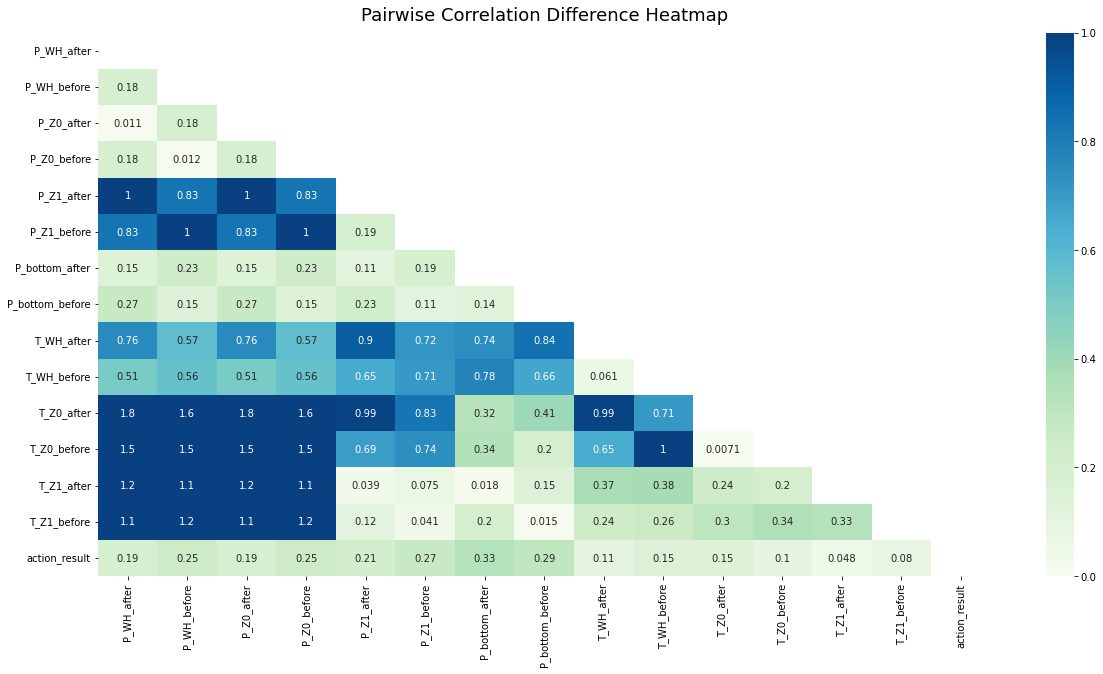

In [11]:
# Plot only the bottom half of the correlation matrix
mask = np.zeros_like(real_data.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(pcd, vmin=0, vmax=1, annot=True, cmap='GnBu', mask=mask)
heatmap.set_title('Pairwise Correlation Difference Heatmap', fontdict={'fontsize':18}, pad=12);

## Bivariate fidelity for GAN-generated data

In [12]:
gan_data = joblib.load('../inputs/df_gan_generated.pkl')
gan_train = joblib.load('../inputs/pre-processed/df_gan_real.pkl')

In [13]:
gan_data.columns

Index(['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'failure'],
      dtype='object')

In [14]:
gan_train.columns

Index(['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'failure'],
      dtype='object')

In [15]:
gan_train.columns = gan_train.columns.sort_values(ascending=True)

In [16]:
gan_data.columns = gan_data.columns.sort_values(ascending=True)

In [17]:
gan_train.corr()

,P_WH_after,P_WH_before,P_Z0_after,P_Z0_before,P_Z1_after,P_Z1_before,P_bottom_after,P_bottom_before,T_WH_after,T_WH_before,T_Z0_after,T_Z0_before,T_Z1_after,T_Z1_before,failure
P_WH_after,1.000000,0.492623,0.996274,0.491667,0.139255,-0.039658,0.545779,0.053131,0.434459,0.035900,0.639643,0.343114,-0.005443,0.008690,0.092790
P_WH_before,0.492623,1.000000,0.492669,0.996140,-0.041508,0.147680,0.061662,0.616644,0.020606,0.503332,0.341565,0.642114,-0.000595,-0.007653,0.093328
P_Z0_after,0.996274,0.492669,1.000000,0.491775,0.137819,-0.041063,0.545870,0.053125,0.434225,0.035879,0.639768,0.344090,-0.005385,0.008931,0.094056
P_Z0_before,0.491667,0.996140,0.491775,1.000000,-0.041066,0.148454,0.061635,0.617302,0.020656,0.504149,0.340887,0.640716,-0.001411,-0.008505,0.092664
P_Z1_after,0.139255,-0.041508,0.137819,-0.041066,1.000000,0.932565,0.128196,-0.043690,0.093801,-0.054575,-0.609002,-0.718642,-0.221216,-0.229649,-0.936309
P_Z1_before,-0.039658,0.147680,-0.041063,0.148454,0.932565,1.000000,-0.046371,0.164706,-0.055667,0.118352,-0.712703,-0.605341,-0.218915,-0.235685,-0.933850
P_bottom_after,0.545779,0.061662,0.545870,0.061635,0.128196,-0.046371,1.000000,0.035710,0.508014,0.027535,0.375305,0.090072,0.049332,0.049453,0.071517
P_bottom_before,0.053131,0.616644,0.053125,0.617302,-0.043690,0.164706,0.035710,1.000000,0.028366,0.596300,0.079898,0.412277,0.054942,0.056436,0.065227
T_WH_after,0.434459,0.020606,0.434225,0.020656,0.093801,-0.055667,0.508014,0.028366,1.000000,0.015424,0.308818,0.064997,0.041724,0.041012,0.069895
T_WH_before,0.035900,0.503332,0.035879,0.504149,-0.054575,0.118352,0.027535,0.596300,0.015424,1.000000,0.077185,0.353404,0.033853,0.035433,0.074689


In [18]:
gan_data.corr()

,P_WH_after,P_WH_before,P_Z0_after,P_Z0_before,P_Z1_after,P_Z1_before,P_bottom_after,P_bottom_before,T_WH_after,T_WH_before,T_Z0_after,T_Z0_before,T_Z1_after,T_Z1_before,failure
P_WH_after,1.000000,0.912762,0.987032,0.980282,-0.328267,-0.356372,0.307028,0.027555,-0.078429,0.867702,0.652331,0.523255,0.700106,0.556341,0.326287
P_WH_before,0.912762,1.000000,0.920643,0.970748,0.006638,-0.015301,0.648112,0.332034,0.218495,0.923236,0.360413,0.205106,0.458914,0.262204,0.004205
P_Z0_after,0.987032,0.920643,1.000000,0.972229,-0.263711,-0.287981,0.355453,0.092765,-0.020928,0.846034,0.589107,0.451769,0.638200,0.486428,0.253366
P_Z0_before,0.980282,0.970748,0.972229,1.000000,-0.169802,-0.197590,0.471109,0.185941,0.070302,0.915592,0.524236,0.383882,0.620231,0.457546,0.178625
P_Z1_after,-0.328267,0.006638,-0.263711,-0.169802,1.000000,0.997839,0.684551,0.877705,0.600533,-0.167797,-0.923491,-0.965150,-0.696941,-0.664363,-0.970705
P_Z1_before,-0.356372,-0.015301,-0.287981,-0.197590,0.997839,1.000000,0.674844,0.873533,0.630331,-0.182821,-0.935276,-0.974113,-0.708921,-0.686567,-0.972348
P_bottom_after,0.307028,0.648112,0.355453,0.471109,0.684551,0.674844,1.000000,0.749841,0.579928,0.540002,-0.404127,-0.537853,-0.289128,-0.462480,-0.649810
P_bottom_before,0.027555,0.332034,0.092765,0.185941,0.877705,0.873533,0.749841,1.000000,0.733981,0.144942,-0.689374,-0.769756,-0.320652,-0.328934,-0.858381
T_WH_after,-0.078429,0.218495,-0.020928,0.070302,0.600533,0.630331,0.579928,0.733981,1.000000,0.251082,-0.519501,-0.553003,-0.125619,-0.297196,-0.578796
T_WH_before,0.867702,0.923236,0.846034,0.915592,-0.167797,-0.182821,0.540002,0.144942,0.251082,1.000000,0.490594,0.370077,0.596847,0.350305,0.197111


In [19]:
pcd_gan = abs(gan_train.corr() - gan_data.corr())

In [20]:
pcd_gan

,P_WH_after,P_WH_before,P_Z0_after,P_Z0_before,P_Z1_after,P_Z1_before,P_bottom_after,P_bottom_before,T_WH_after,T_WH_before,T_Z0_after,T_Z0_before,T_Z1_after,T_Z1_before,failure
P_WH_after,0.000000,0.420139,0.009242,0.488615,0.467523,0.316714,0.238751,0.025576,0.512888,0.831802,0.012688,0.180140,0.705550,0.547651,0.233497
P_WH_before,0.420139,0.000000,0.427974,0.025392,0.048146,0.162980,0.586450,0.284610,0.197889,0.419905,0.018848,0.437007,0.459509,0.269857,0.089123
P_Z0_after,0.009242,0.427974,0.000000,0.480454,0.401530,0.246918,0.190416,0.039640,0.455153,0.810155,0.050661,0.107679,0.643585,0.477497,0.159311
P_Z0_before,0.488615,0.025392,0.480454,0.000000,0.128737,0.346044,0.409474,0.431361,0.049646,0.411444,0.183349,0.256833,0.621643,0.466051,0.085961
P_Z1_after,0.467523,0.048146,0.401530,0.128737,0.000000,0.065274,0.556355,0.921395,0.506732,0.113223,0.314489,0.246508,0.475724,0.434714,0.034397
P_Z1_before,0.316714,0.162980,0.246918,0.346044,0.065274,0.000000,0.721216,0.708827,0.685998,0.301173,0.222573,0.368772,0.490006,0.450882,0.038498
P_bottom_after,0.238751,0.586450,0.190416,0.409474,0.556355,0.721216,0.000000,0.714131,0.071914,0.512466,0.779432,0.627925,0.338460,0.511933,0.721328
P_bottom_before,0.025576,0.284610,0.039640,0.431361,0.921395,0.708827,0.714131,0.000000,0.705615,0.451358,0.769272,1.182034,0.375594,0.385370,0.923608
T_WH_after,0.512888,0.197889,0.455153,0.049646,0.506732,0.685998,0.071914,0.705615,0.000000,0.235658,0.828319,0.618000,0.167343,0.338209,0.648691
T_WH_before,0.831802,0.419905,0.810155,0.411444,0.113223,0.301173,0.512466,0.451358,0.235658,0.000000,0.413409,0.016673,0.562993,0.314872,0.122422


In [21]:
pcd_gan.mean().mean()

0.36726737587942704

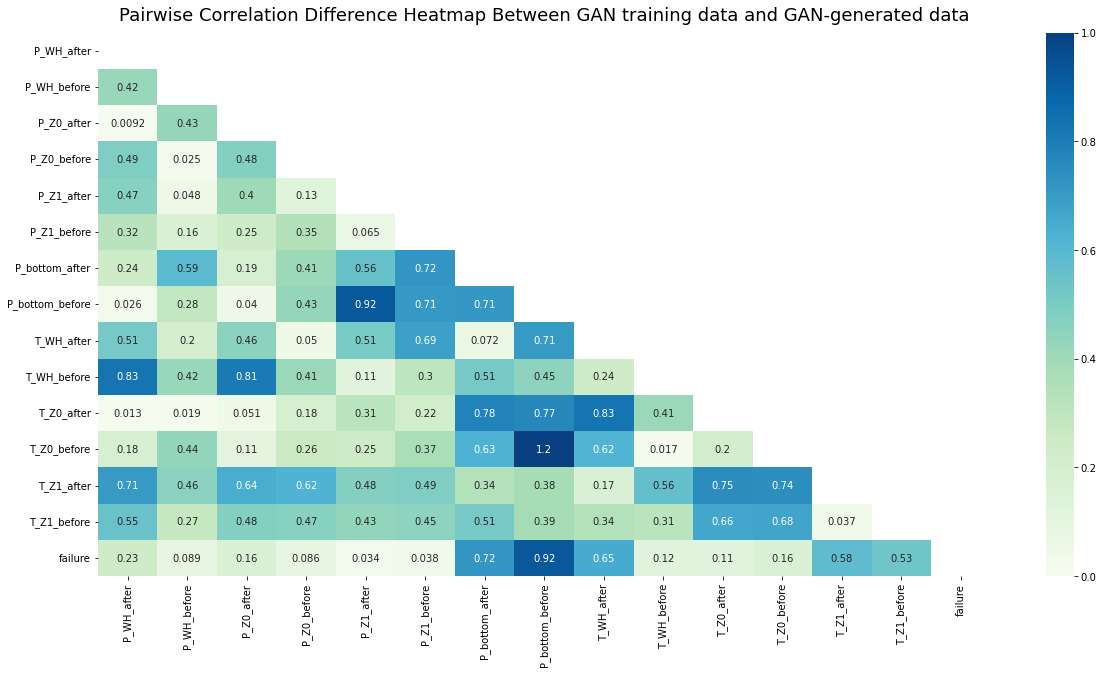

In [23]:
# Plot only the bottom half of the correlation matrix
mask = np.zeros_like(real_data.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(pcd_gan, vmin=0, vmax=1, annot=True, cmap='GnBu', mask=mask)
heatmap.set_title('Pairwise Correlation Difference Heatmap Between GAN training data and GAN-generated data', fontdict={'fontsize':18}, pad=12);

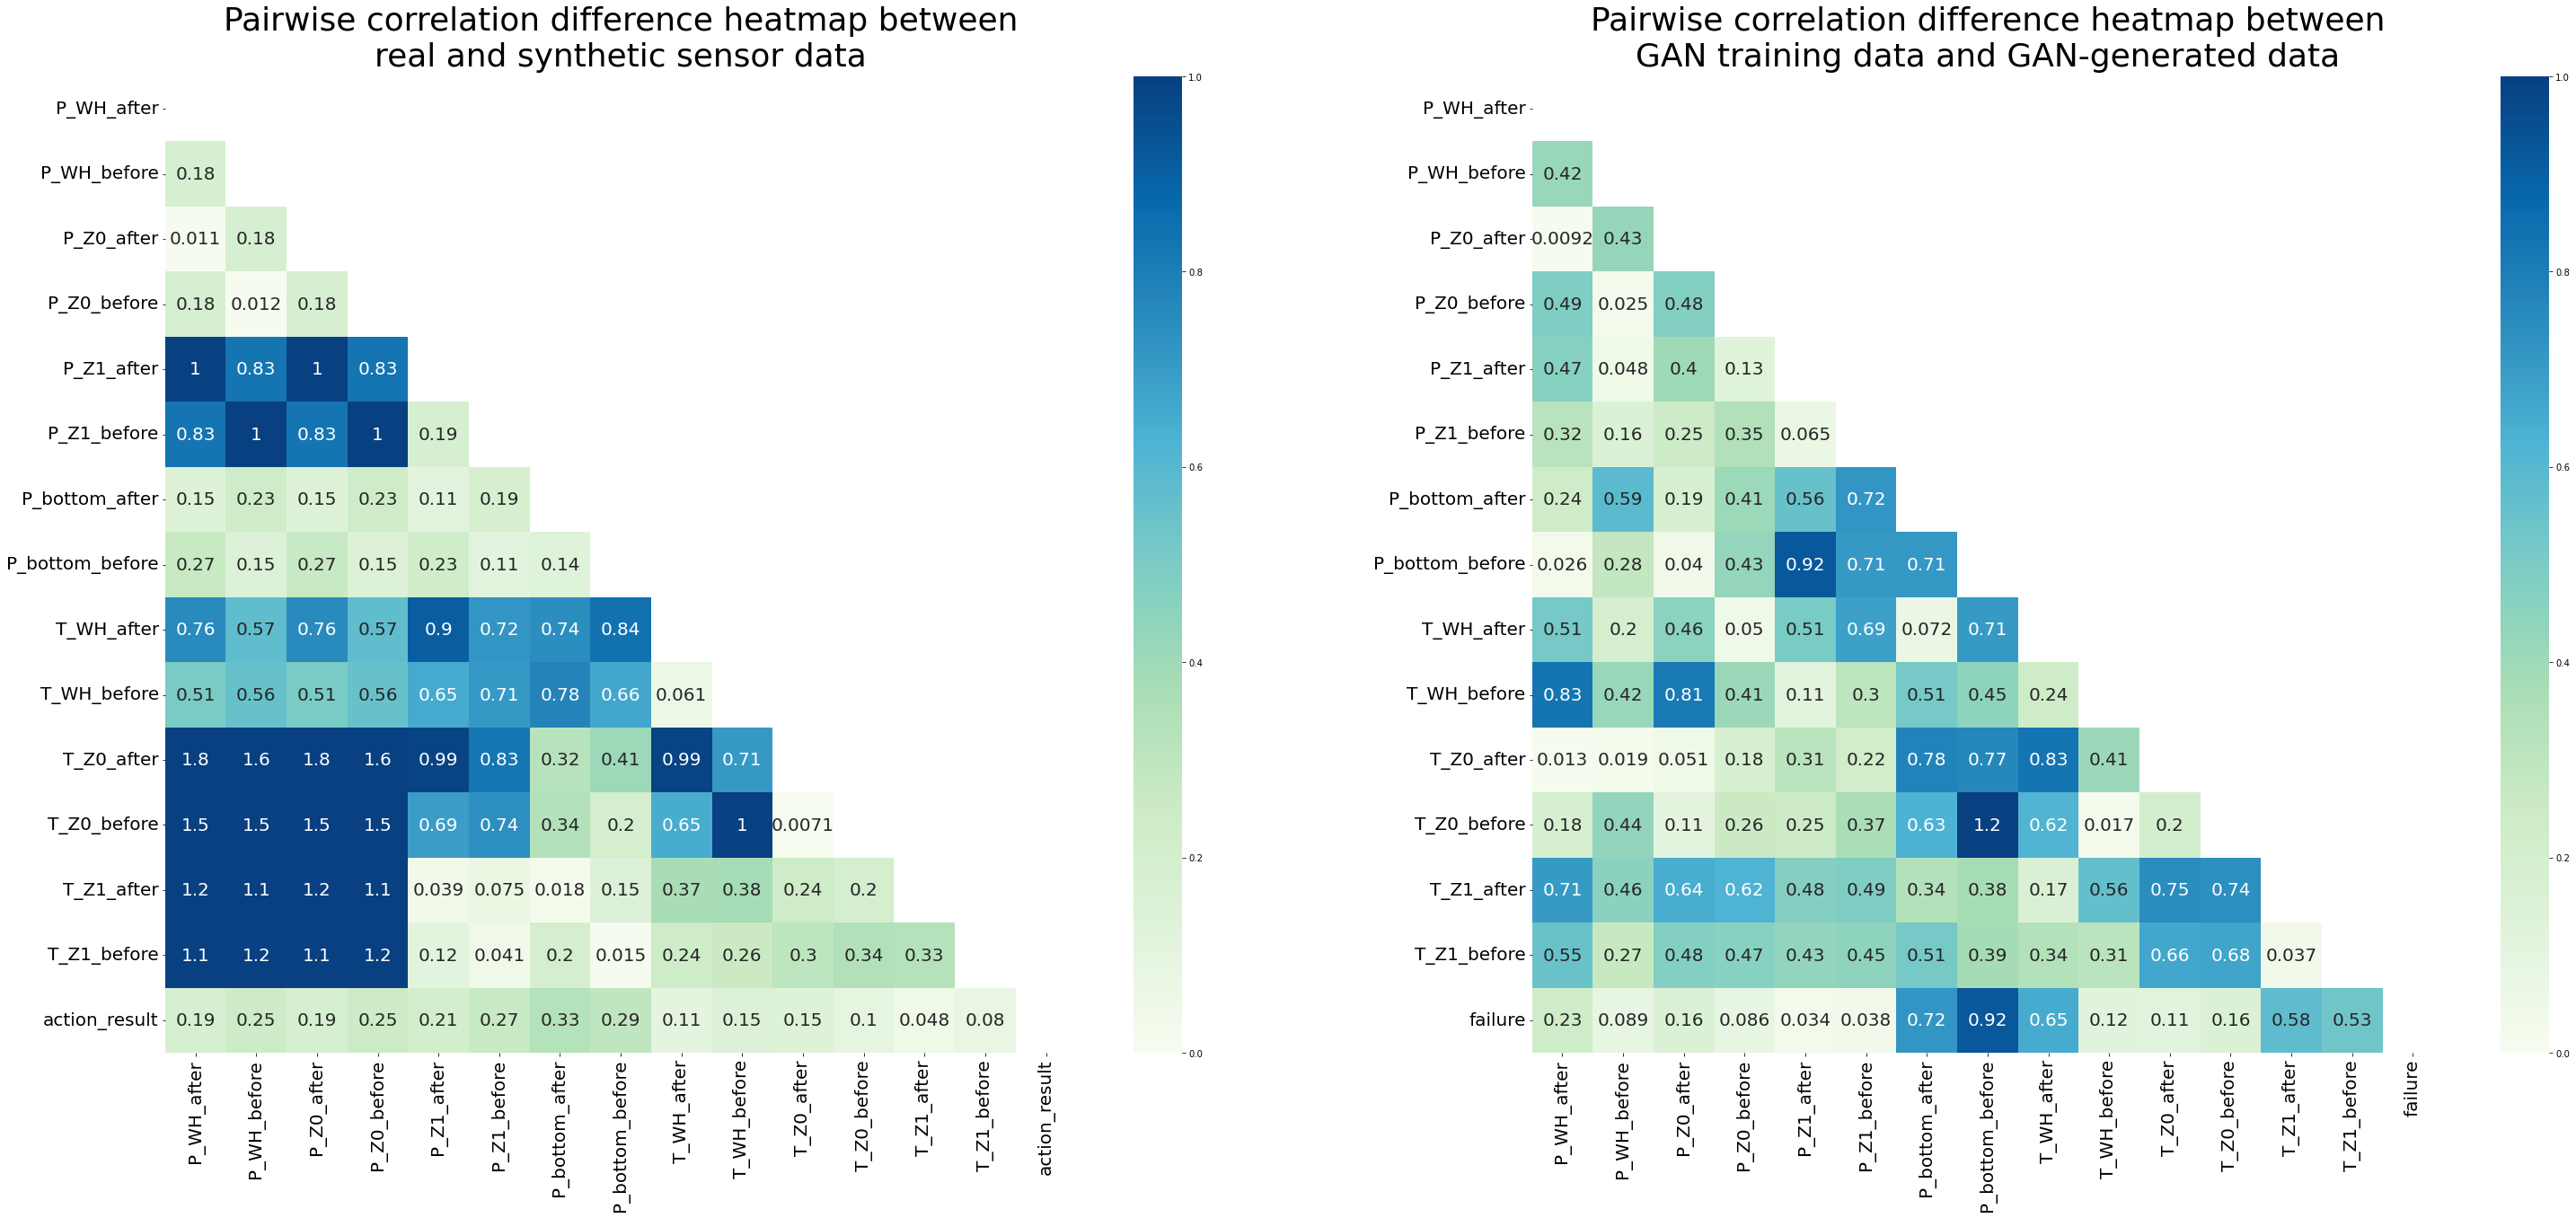

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(50, 20))

sns.heatmap(pcd, vmin=0, vmax=1, annot=True, cmap='GnBu', mask=mask, ax=axes[0], annot_kws={"size": 20})
title1 = 'Pairwise correlation difference heatmap between\nreal and synthetic sensor data'
axes[0].set_title(title1, fontdict={'fontsize': 36}, pad=12)
axes[0].tick_params(axis='both', which='major', labelsize=20)  # Adjust font size of axis labels and tick labels


sns.heatmap(pcd_gan, vmin=0, vmax=1, annot=True, cmap='GnBu', mask=mask, ax=axes[1], annot_kws={"size": 20})
title2 = 'Pairwise correlation difference heatmap between\nGAN training data and GAN-generated data'
axes[1].set_title(title2, fontdict={'fontsize': 36}, pad=12)
axes[1].tick_params(axis='both', which='major', labelsize=20)  # Adjust font size of axis labels and tick labels

plt.show()